{'New Delhi': {'coordinates': [77.22445, 28.63576], 'mission': 'U.S. Department of State - India', 'monitors': [{'parameter': 'PM2.5', 'beginTimeLT': '03/27/2017 07:00:00 PM', 'concUnit': 'ug/m3', 'aqi': [107, 127, 152, 152, 155, 160, 160, 165, 185, 195, 182, 180, 198, 211, 210, 194, 188, 180, 167, 158, 150, 130, 133, 248], 'aqiCat': [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 5], 'conc': [39.0, 54.0, 70.0, 59.0, 69.0, 81.0, 72.0, 94.0, 161.0, 159.0, 92.0, 106.0, 183.0, 174.0, 158.0, 119.0, 115.0, 95.0, 63.0, 50.0, 42.0, 39.0, 50.0, 348.0], 'rss': 'http://stateair.net/dos/RSS/NewDelhi/NewDelhi-PM2.5.xml'}], 'displayOnWebsite': True}, 'Jakarta South': {'coordinates': [106.79324, -6.236704], 'mission': 'U.S. Department of State - Indonesia', 'monitors': [{'parameter': 'PM2.5', 'beginTimeLT': '03/27/2017 09:00:00 PM', 'concUnit': 'ug/m3', 'aqi': [93, 125, 153, 155, 155, 157, 166, 169, 166, 166, 162, 155, 151, 109, 84, 73, 61, 62, 65, 66, 46, 33, 40, 61], 'aqiCat'

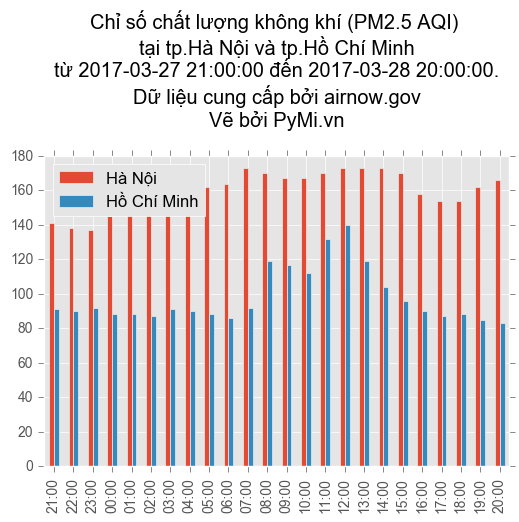

In [1]:
import requests
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

matplotlib.rc('font', family='Arial')

matplotlib.style.use('ggplot')

data = requests.get('https://stateair.net/dos/AllPosts24Hour.json')
dj = data.json()
print(dj)
hn, hcm = dj['Hanoi'], dj['Ho Chi Minh City']
hnaqi = hn['monitors'][0]['aqi']
hcmaqi = hcm['monitors'][0]['aqi']
start = hn['monitors'][0]['beginTimeLT']

hours = pd.date_range(start=start, periods=24, freq='H')
start = hours[0]
stop = hours[-1]
hours = [f.strftime('%H:%M') for f in hours]
title = 'Chỉ số chất lượng không khí (PM2.5 AQI) \ntại tp.Hà Nội và tp.Hồ Chí Minh\ntừ %s đến %s.\nDữ liệu cung cấp bởi airnow.gov\nVẽ bởi PyMi.vn\n' % (start, stop)
df = pd.DataFrame([hnaqi, hcmaqi], index=['Hà Nội', 'Hồ Chí Minh'], columns=hours).T
df.plot.bar(title=title)

